# KNN for IRIS Classification

# Load the IRIS Dataset

In [1]:
# load the dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
# get class name for iris_dataset in python
# using type() function
type(iris_dataset)

sklearn.utils._bunch.Bunch

In [3]:
# print the keys of iris_dataset.keys()
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# read the description of the dataset
iris_dataset['DESCR']
# iris_dataset['feature_names']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
# show the first few lines of the target
print("First five rows of data:\n", iris_dataset['target'][:5])

First five rows of data:
 [0 0 0 0 0]


In [6]:
# get the unique value of the target variable
import numpy as np

# get all the unique values of the target variable
print(np.unique(iris_dataset['target']))

[0 1 2]


In [7]:
# print the target names
print("Target Names:", iris_dataset['target_names'])

# show the first few lines of the dataset
print("First five rows of data:\n", iris_dataset['data'][:5])

Target Names: ['setosa' 'versicolor' 'virginica']
First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


# Split Data into Training and Testing Data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], train_size= 0.75, random_state=0)

In [9]:
# the dimension of the training data and testing data
print(X_train.shape)

(112, 4)


In [10]:
# create Pandas dataframe from data in X_train
# label the column using the strings in iris_dataset.feature_names (use columns argument)
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns= iris_dataset.feature_names)
# show the first 5 lines of the dataset
iris_dataframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

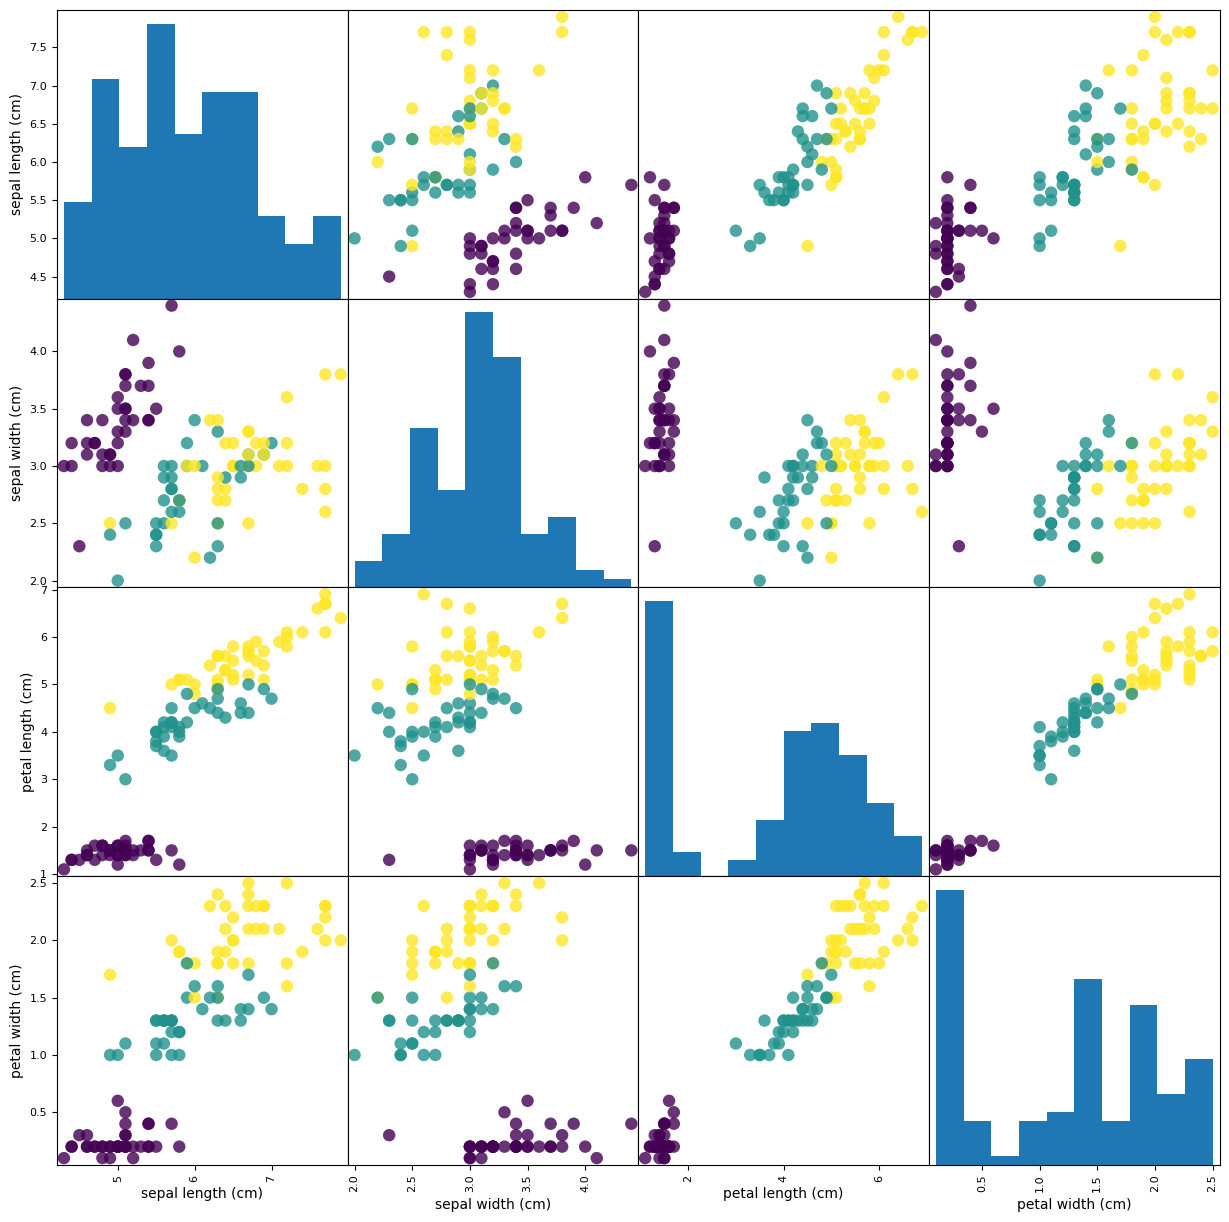

In [11]:
# create a scatter matrix from the dataframe color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', s=80, alpha=0.8)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 3.5 MB/s eta 0:00:00


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

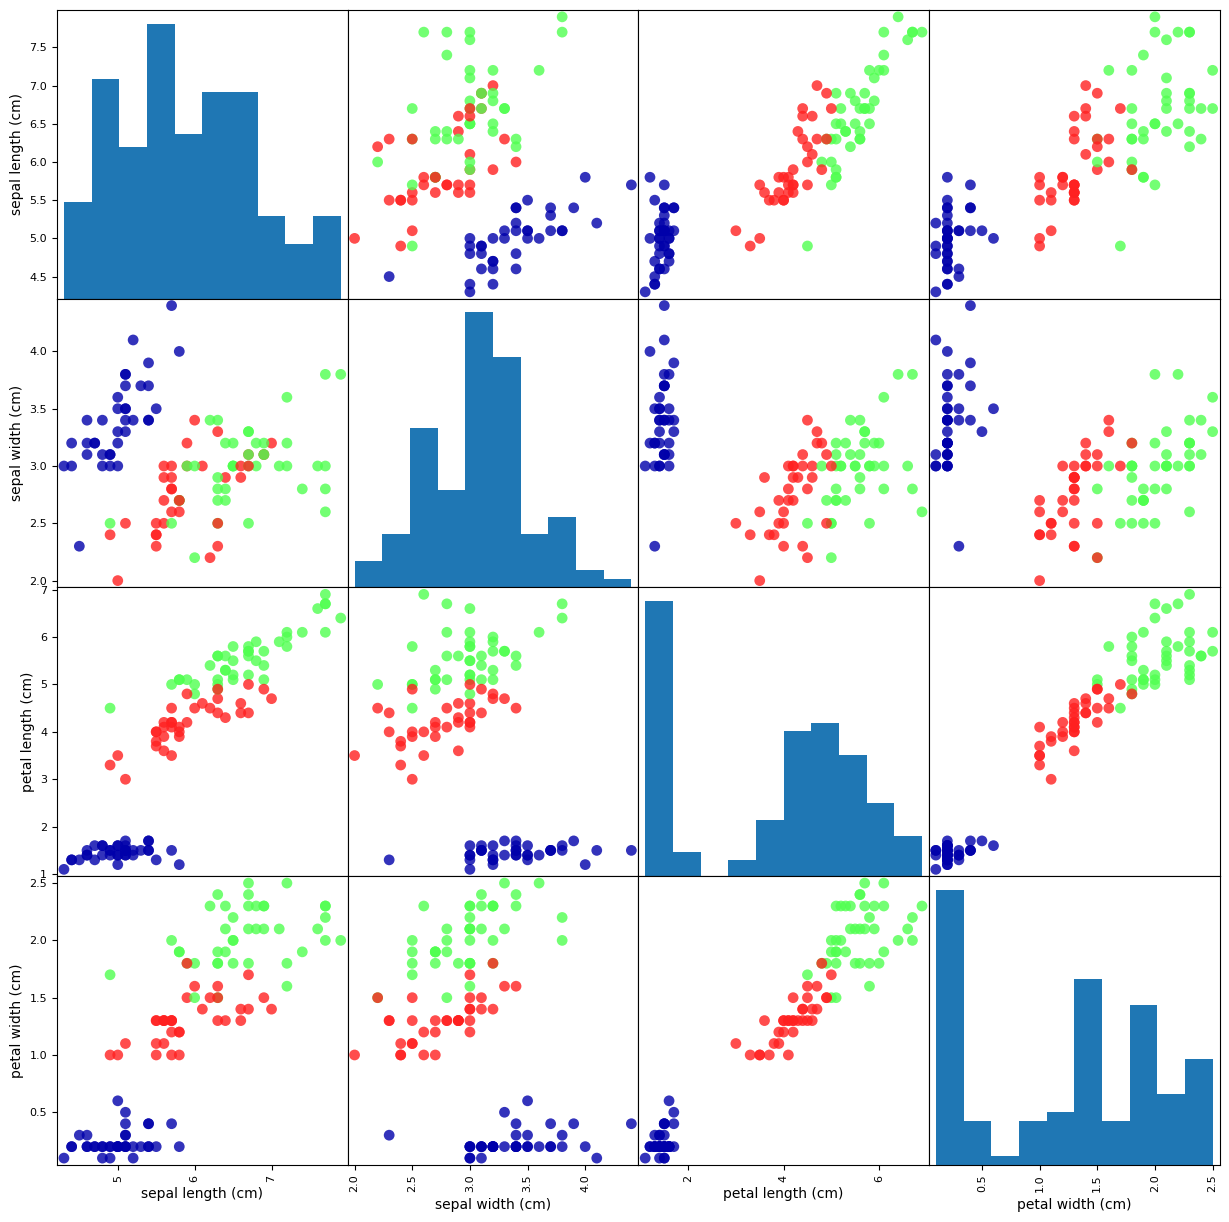

In [12]:
!pip install mglearn
import mglearn
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', s=60, alpha=0.8, cmap=mglearn.cm3)

# First Model: K-Neareast Neighbors

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# define a knn object from KNeighborsClassier class
# set the number of neighbors as one by using n_neighbors
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
# use fit() method of the defined object knn to fit with
# the training data X_train and y_train
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

 # Making Predictions for New Observations

In [15]:
# create one new observation
import numpy as np
X_new = np.array([5., 29, 1, 0.2])
print("X_new.shape:", X_new.shape)

# if use the current X_new, there will be an error when running prediction
X_new = np.array([[5., 29, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (4,)
X_new.shape: (1, 4)


In [16]:
# use predict() method of the defined object knn to make predictions with X_new
# make predictions
prediction = knn.predict(X_new)
print("Prediction", prediction)

Prediction [0]


In [17]:
# print target name
print('Predicted target name:', iris_dataset['target_names'][prediction])

Predicted target name: ['setosa']


# Evaluating the Model

In [18]:
# use predict() method of knn to make predictions for all the observations in the test set
y_pred = knn.predict(X_test)
print("Test set prediction:\n:", y_pred)

Test set prediction:
: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [19]:
# evaluate the model in terms of accuracy
# obtain the accuracy of the fitted model for the test datast
accuracy = np.mean(y_test==y_pred)
print("Test set score:", accuracy)

Test set score: 0.9736842105263158


In [20]:
# print the accurarcy in 2 decimal digits
print("Test set score: {:.2f}".format(accuracy))

Test set score: 0.97


In [21]:
# evaluate the model in terms of accuracy
# apply the score function of knn on X_test, y_test
score = knn.score(X_test, y_test)
print("Test set score : {:.2f}".format(score))

Test set score : 0.97


What is the meaning of test set score? Is the fitted model reliable?  (2 points)

# Summary and Outlook

What if we change the number of neighbors to int($\sqrt{n}$), where $n$ is the number of sampels in the training dataset.

In [22]:
# Define a new knn_new classifier and set the number of neighbour as int(sqrt(n))

# first get the number of samples of the training set
n = len(X_train)
print("Number of Samples in the Training Set: ", n)
# obtain the number of neighbours
from math import sqrt
k = int(sqrt(n))
print("Number of Neighbors: ",k)
# define the new knn_new classifier object
knn_new =  KNeighborsClassifier(n_neighbors=1)

# Use the new classifier knn_new to train X_train and y_train
knn_new.fit(X_train, y_train)

# Evaluate your new classifier knn_new in terms of prediction accuracy using X_test and y_test
# Model evaluation
ypred = knn_new.predict(X_test)
accuracy_new = knn_new.score(X_test,ypred)
print("Test set score : {:.2f}".format(accuracy_new))

Number of Samples in the Training Set:  112
Number of Neighbors:  10
Test set score : 1.00


# Logistic Regression


In [24]:
# select only the petal width feature
X = iris_dataset["data"][:, 3:]
# Data transformation for the response variable
# Use 1 to represent virginica species of the iris flower
# Use 0 to represent the other two species
y = (iris_dataset['target']==2).astype(np.intc)

In [ ]:
# Split the data into training and testing
# Make predictions for the testing dataset with testing size 0.3
# Compute the prediction accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

# logistc regression model
logRegNew = LogisticRegression()
logRegNew.fit(X_train, y_train )
yPred = logRegNew.predict(X_test)

# evaluate accuracy of the predictions
print("Test set score: {:.3f}".format(logRegNew.score(X_test, y_test )))

Test set score: 0.978


In [ ]:
# Look at the model's estimated probabilities for flowers with petal width
# varying from 0 to 3 cm
# np.reshape() function allows one dimension to be -1, which means "unspecified":
# the value is inferred from the length of the array and the remaining dimensions
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# linspace creates a sequence of numbers st. point 0, end. point 3
yProb = logRegNew.predict_proba(X_new)

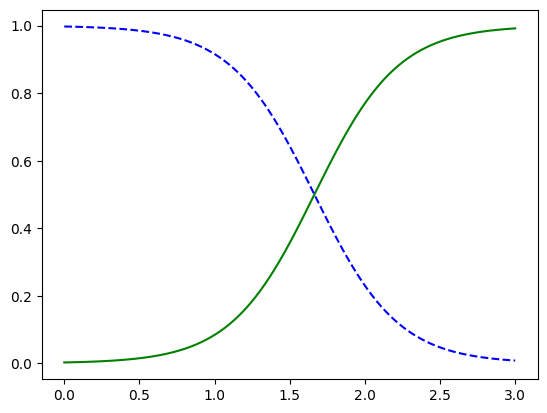

In [ ]:
import matplotlib.pyplot as plt

# Simple plot to illustrate decision boundary
plt.plot(X_new, yProb[:, 1], "g-", label="Iris Virginica")
plt.plot(X_new, yProb[:, 0], "b--", label="Not Iris Virginica")

In [ ]:
# make the plot a little fancier
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = logRegNew.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(16, 10))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [ ]:
## What if you want to predict labels using LogisticRegression
## Let us say I have two observations with petal width 1.7 and 1.5
print(logRegNew.predict([[1.7], [1.5]]))
print(decision_boundary)